# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import plotly.express as px

In [31]:
# Carregar o dataset
file_path = "/mnt/data/Mall_Customers.csv"
df = pd.read_csv("Mall_Customers.csv")  # O delimitador padrão (vírgula) já está correto

# Exibir informações iniciais do dataset
print(" Informações do dataset:")
print(df.info())

print("\n Primeiras linhas:")
print(df.head())

print("\n Resumo estatístico:")
print(df.describe(include="all"))

print("\n Dimensões do dataset:", df.shape)

print("\n Valores ausentes por coluna:")
print(df.isnull().sum())


 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

 Primeiras linhas:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

 Resu

In [32]:
# 'CustomerID' é apenas um identificador e não agrega valor analítico
df_clean = df.copy()
df_clean = df_clean.drop(columns=["CustomerID"])

# Converter variável categórica "Gender" em variável numérica
# Female = 0, Male = 1
df_clean["Gender"] = df_clean["Gender"].map({"Female": 0, "Male": 1})

# Verificar e remover duplicatas
duplicates = df_clean.duplicated().sum()
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"{duplicates} duplicatas removidas.")
else:
    print("Nenhuma duplicata encontrada.")

# Normalização (Min-Max Scaling)
# Transforma os valores para o intervalo [0, 1]
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler_minmax.fit_transform(df_clean),
    columns=df_clean.columns
)

# Padronização (StandardScaler)
# Centraliza os dados com média = 0 e desvio padrão = 1
scaler_std = StandardScaler()
df_standardized = pd.DataFrame(
    scaler_std.fit_transform(df_clean),
    columns=df_clean.columns
)

# Exibir resultados
print("\n Dataset Limpo:")
print(df_clean.head())

print("\n Dataset Normalizado (0-1):")
print(df_normalized.head())

print("\n Dataset Padronizado (Z-score):")
print(df_standardized.head())


Nenhuma duplicata encontrada.

 Dataset Limpo:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

 Dataset Normalizado (0-1):
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0     1.0  0.019231            0.000000                0.387755
1     1.0  0.057692            0.000000                0.816327
2     0.0  0.038462            0.008197                0.051020
3     0.0  0.096154            0.008197                0.775510
4     0.0  0.250000            0.016393                0.397959

 Dataset Padronizado (Z-score):
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035

c:\Users\Léo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Léo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Léo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Léo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

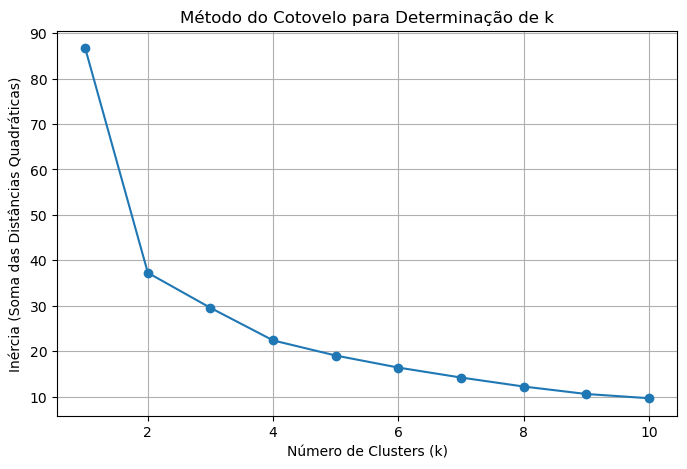


 Amostra do dataset com clusters:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        3
1       1   21                  15                      81        3
2       0   20                  16                       6        1
3       0   23                  16                      77        2
4       0   31                  17                      40        2

 Coordenadas dos centróides (normalizados):
         Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.000000e+00  0.772436            0.316667                0.373129
1 -2.775558e-16  0.579021            0.359165                0.344712
2 -3.330669e-16  0.200742            0.366120                0.680451
3  1.000000e+00  0.205586            0.376269                0.706511
4  1.000000e+00  0.318510            0.547643                0.112245


c:\Users\Léo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:

# APLICAÇÃO DO ALGORITMO K-MEANS
# Carregar o dataset
df = pd.read_csv("Mall_Customers.csv")

# Limpeza de dados
df_clean = df.copy()
df_clean = df_clean.drop(columns=["CustomerID"])
df_clean["Gender"] = df_clean["Gender"].map({"Female": 0, "Male": 1})

# Normalização (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler_minmax.fit_transform(df_clean),
    columns=df_clean.columns
)

# Determinar o número ideal de clusters (k)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Método do Cotovelo para Determinação de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma das Distâncias Quadráticas)')
plt.grid(True)
plt.show()

# Escolher o k ideal (por exemplo, k=5)
k_optimal = 5
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(df_normalized)

# Adicionar os rótulos ao dataset original
df_clean["Cluster"] = clusters

# Exibir resultados
print("\n Amostra do dataset com clusters:")
print(df_clean.head())

print("\n Coordenadas dos centróides (normalizados):")
print(pd.DataFrame(kmeans_final.cluster_centers_, columns=df_clean.columns[:-1]))


In [35]:
# Garantir que o DataFrame tenha os dados necessários
df_visual = df_clean.copy()
df_visual["Annual Income (k$)"] = df["Annual Income (k$)"]
df_visual["Spending Score (1-100)"] = df["Spending Score (1-100)"]
df_visual["Age"] = df["Age"]

# Criar o gráfico 3D interativo
fig = px.scatter_3d(
    df_visual,
    x="Age",
    y="Annual Income (k$)",
    z="Spending Score (1-100)",
    color="Cluster",
    color_continuous_scale="viridis",
    title=" Visualização 3D dos Clusters de Clientes",
    symbol="Cluster",
    opacity=0.8
)

# Ajustes visuais
fig.update_traces(marker=dict(size=6, line=dict(width=0)))
fig.update_layout(
    scene=dict(
        xaxis_title="Idade",
        yaxis_title="Renda Anual (k$)",
        zaxis_title="Pontuação de Gasto (1-100)"
    ),
    width=900,
    height=700,
    template="plotly_dark"
)

fig.show()


## Aplicações Praticas ##

    1 — Renda Alta, Gasto Moderado

Perfil: Clientes financeiramente estáveis, porém conservadores nos gastos.
Comportamento: Compram ocasionalmente, valorizam qualidade e confiança.

Aplicações práticas:
Criar programas de fidelidade premium (cashback, pontos, acesso antecipado a lançamentos).
Enviar ofertas personalizadas de produtos de maior valor agregado.
Investir em marketing de relacionamento (atendimento personalizado e pós-venda).

    2 — Jovens, Renda Baixa, Alto Gasto

Perfil: Jovens consumidores impulsivos, buscam tendências e novidades.
Comportamento: Alta propensão ao consumo mesmo com renda limitada.

Aplicações práticas:
Focar em campanhas de marketing digital (redes sociais, influenciadores, TikTok Ads).
Oferecer planos de parcelamento, descontos progressivos e benefícios instantâneos.
Criar clubes de vantagens para aumentar retenção e recompra.

    3 — Renda Média, Baixo Gasto

Perfil: Clientes mais racionais, focados em preço e utilidade.
Comportamento: Baixo engajamento, compram apenas quando há necessidade.

Aplicações práticas:
Oferecer descontos direcionados e promoções sazonais.
Enviar e-mails personalizados com base em comportamento anterior (remarketing).
Trabalhar campanhas de retenção, mostrando valor agregado dos produtos.

    4 — Alta Renda, Alto Gasto (VIP)

Perfil: Clientes de luxo, dispostos a pagar por exclusividade e conveniência.
Comportamento: Compram frequentemente e representam alto valor para a empresa.

Aplicações práticas:
Criar clubes VIP com benefícios exclusivos, atendimento preferencial e pré-vendas.
Aplicar marketing de experiência (eventos, convites, produtos personalizados).
Implementar estratégias de cross-selling e upselling de produtos premium.

    5 — Perfil Intermediário

Perfil: Consumidores equilibrados, nem impulsivos nem conservadores.
Comportamento: Representam o “cliente médio” da empresa.

Aplicações práticas:
Usar para campanhas de branding e awareness.
Enviar comunicações gerais de produtos populares.
Monitorar o comportamento — podem migrar para clusters de maior valor com estímulo adequado.